#**1. Load data**

In [ ]:
import h5py
import numpy as np

In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/H5PY'

/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/H5PY


In [ ]:
!ls ./SaveTrain

data_trainHOG.h5  data_trainLBP.h5  data_trainVec.h5  label_trainh5.h5


In [ ]:
with h5py.File('./SaveTrain/data_trainLBP.h5', 'r') as f:  
    data_train = np.array(f['data'])
print(data_train.shape) 

(1096, 26)


In [ ]:
with h5py.File('./SaveTrain/label_trainh5.h5','r') as f:
    labels_train = np.array(f['data'])

print(labels_train.shape)

(1096,)


In [ ]:
with h5py.File('./SaveTest/data_testLBP.h5', 'r') as f:  
    data_test = np.array(f['data'])
print(data_test.shape) 

(461, 26)


In [ ]:
with h5py.File('./SaveTest/label_testh5.h5','r') as f:
    labels_test = np.array(f['data'])

print(labels_test.shape)

(461,)


#**2. Chọn Model**

Thử nghiệm các mô hình:
> **Linear SVC**
>
> **Logistic Regression**
>
> **KNN**
>
> **Naive Bayes**
>
> **Decision Tree**

##**2.1 Import Thư viện**

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix,accuracy_score
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

seed = 42

#**3. Sử dụng  StratifiedKFold**

In [ ]:
models = []
models.append(LogisticRegression(random_state=seed,max_iter=100000))
models.append(KNeighborsClassifier())
models.append(DecisionTreeClassifier(random_state=seed))
models.append(GaussianNB())
models.append(LinearSVC(random_state=seed,max_iter=100000))

In [ ]:
results_acc = [[] for _ in range(len(models))]
results_f1 = [[] for _ in range(len(models))]

names = ['' for _ in range(len(models))]

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
for train_idx, val_idx in skf.split(Xtrain,ytrain):
	X_train_fold, X_val_fold = Xtrain[train_idx], Xtrain[val_idx]
	y_train_fold, y_val_fold = ytrain[train_idx], ytrain[val_idx]
	for i in range(len(models)):
		model = models[i]
		model.fit(X_train_fold, y_train_fold)
		y_pred = model.predict(X_val_fold)
		score_f1 = f1_score(y_val_fold, y_pred,average='micro')
		score_acc = accuracy_score(y_val_fold,y_pred)
  
		results_acc[i].append(score_acc)
		results_f1[i].append(score_f1)
		names[i] = model.__class__.__name__


#**4. So sánh các model**

In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/Model/ModelLBP'

/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/Model/ModelLBP


##**4.1 Plot với Accuracy score:**

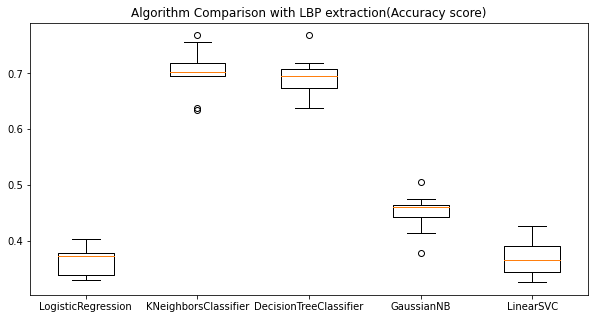

In [ ]:
%matplotlib inline 
plt.figure(figsize=(10,5))
plt.boxplot(results_acc,labels=names)
plt.title('Algorithm Comparison with LBP extraction(Accuracy score)')
plt.savefig('Algorithm Comparison with LBP extraction(Accuracy score).png',bbox_inches='tight')
plt.show()

In [82]:
acc_score = np.array(results_acc)
for idx, model in enumerate(models):
    msg = "%s: %f (%f)" % (model.__class__.__name__, acc_score[idx].mean(), acc_score[idx].std())
    print(msg)

LogisticRegression: 0.363738 (0.026137)
KNeighborsClassifier: 0.703232 (0.040950)
DecisionTreeClassifier: 0.693550 (0.034853)
GaussianNB: 0.451264 (0.033060)
LinearSVC: 0.368631 (0.031404)


##**4.2 Plot với F1 score:**

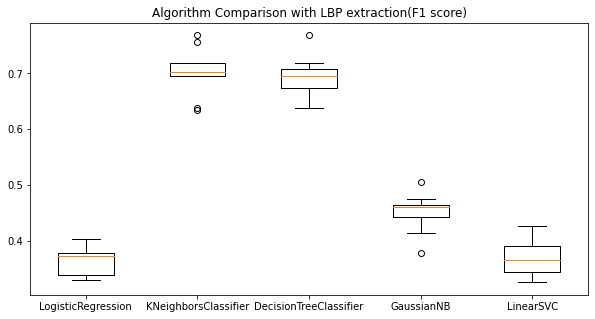

In [ ]:
%matplotlib inline 
plt.figure(figsize=(10,5))
plt.boxplot(results_f1,labels=names)
plt.title('Algorithm Comparison with LBP extraction(F1 score)')
plt.savefig('Algorithm Comparison with LBP extraction(F1 score).png',bbox_inches='tight')
plt.show()

In [83]:
f1_score = np.array(results_f1)
for idx, model in enumerate(models):
    msg = "%s: %f (%f)" % (model.__class__.__name__, f1_score[idx].mean(), f1_score[idx].std())
    print(msg)

LogisticRegression: 0.363738 (0.026137)
KNeighborsClassifier: 0.703232 (0.040950)
DecisionTreeClassifier: 0.693550 (0.034853)
GaussianNB: 0.451264 (0.033060)
LinearSVC: 0.368631 (0.031404)


#**5. Chỉnh sửa tham số**

#**6. Lưu model tốt nhất với trích xuất LBP**

In [ ]:
import joblib
filename = '/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/Model/ModelLBP/BestModel_LBP.sav'


In [ ]:
joblib.dump(models[1],filename)

['/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/Model/ModelLBP/BestModel_LBP.sav']

In [ ]:
loadmodel = joblib.load(filename)